In [1]:
df <- read.csv('C:\\Users\\520\\Downloads\\epldata_final.csv')
head(df)

name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
Alexis Sanchez,Arsenal,28,LW,1,65,4329,12.0,17.10%,264,3,Chile,0,4,1,1,0
Mesut Ozil,Arsenal,28,AM,1,50,4395,9.5,5.60%,167,2,Germany,0,4,1,1,0
Petr Cech,Arsenal,35,GK,4,7,1529,5.5,5.90%,134,2,Czech Republic,0,6,1,1,0
Theo Walcott,Arsenal,28,RW,1,20,2393,7.5,1.50%,122,1,England,0,4,1,1,0
Laurent Koscielny,Arsenal,31,CB,3,22,912,6.0,0.70%,121,2,France,0,4,1,1,0
Hector Bellerin,Arsenal,22,RB,3,30,1675,6.0,13.70%,119,2,Spain,0,2,1,1,0


Installing package into 'C:/Users/520/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'Amelia' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'Amelia'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\520\Documents\R\win-library\3.6\00LOCK\Amelia\libs\x64\Amelia.dll to C:\Users\520\Documents\R\win-library\3.6\Amelia\libs\x64\Amelia.dll: Permission denied"Warning message:
"restored 'Amelia'"


The downloaded binary packages are in
	C:\Users\520\AppData\Local\Temp\Rtmp2dQOtx\downloaded_packages


Warning message:
"package 'Amelia' was built under R version 3.6.3"Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.6, built: 2019-11-24)
## Copyright (C) 2005-2020 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


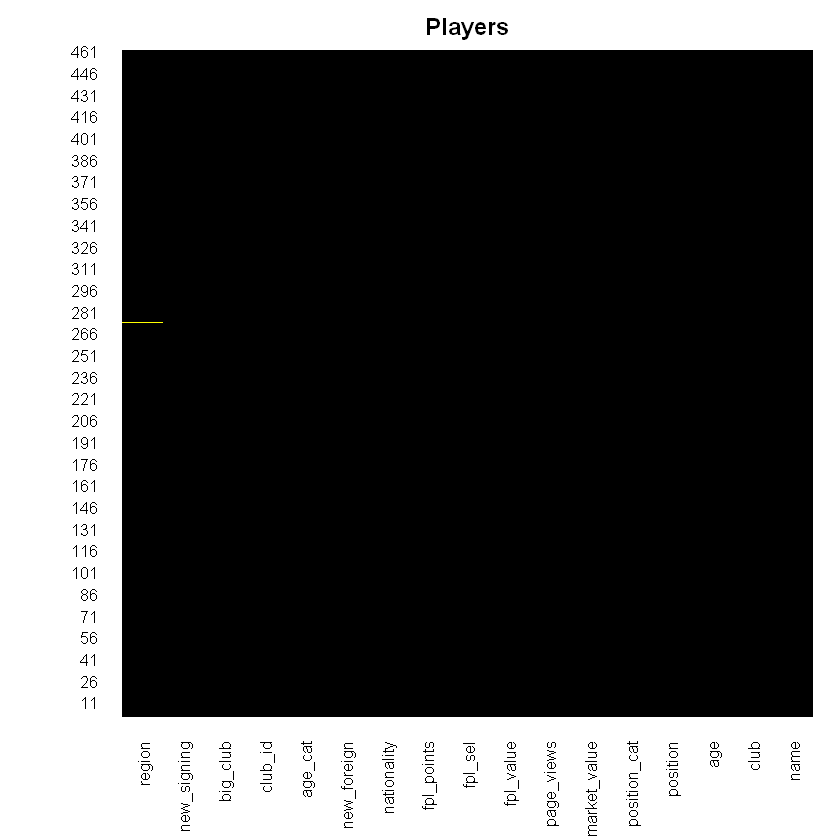

In [2]:
#here i am trying to predict the market values of the players
#finding if there are any missing values
install.packages('Amelia')
library(Amelia)
missmap(df, main="Players",
 col=c("yellow", "black"), legend=FALSE)


In [3]:
#since there is only on missing value i am replacing it with zero
any(is.na(df))
df[is.na(df)]=0

[1] TRUE

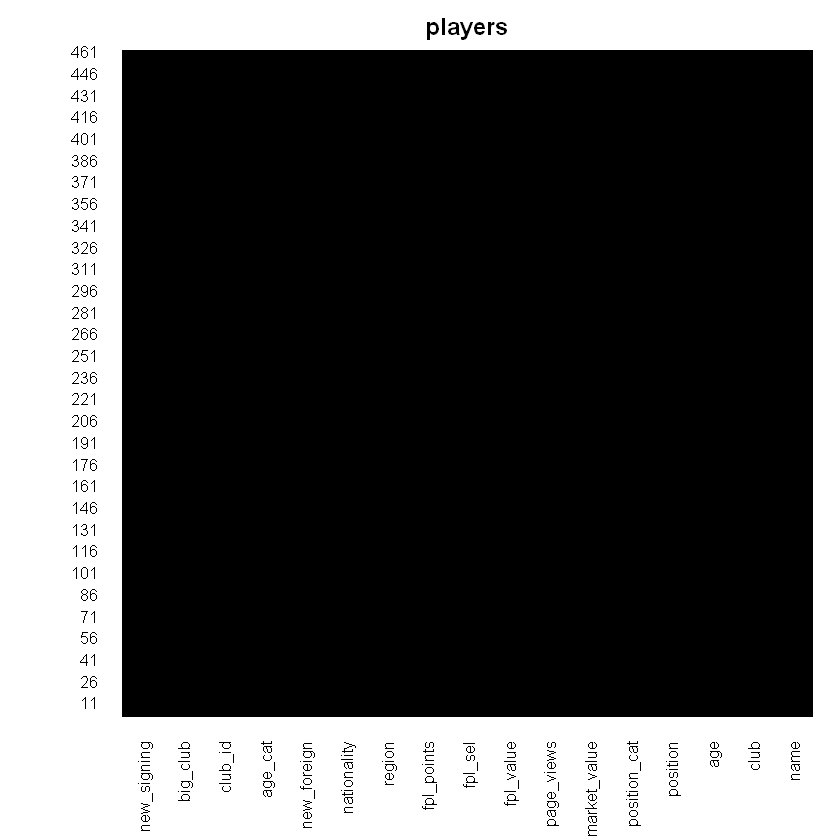

In [4]:
missmap(df, main="players",
 col=c("yellow", "black"), legend=FALSE)

#now there is no missing data 

In [5]:
summary(df)

                      name                    club          age      
 Ã…Â\201ukasz FabiaÃ…â\200žski:  1   Arsenal          : 28   Min.   :17.0  
 Aaron Cresswell        :  1   Everton          : 28   1st Qu.:24.0  
 Aaron Lennon           :  1   Huddersfield     : 28   Median :27.0  
 Aaron Mooy             :  1   Liverpool        : 27   Mean   :26.8  
 Aaron Ramsey           :  1   Manchester+United: 25   3rd Qu.:30.0  
 Abdoulaye Doucoure     :  1   Swansea          : 25   Max.   :38.0  
 (Other)                :455   (Other)          :300                 
    position    position_cat   market_value     page_views       fpl_value     
 CB     : 85   Min.   :1.00   Min.   : 0.05   Min.   :   3.0   Min.   : 4.000  
 CM     : 63   1st Qu.:1.00   1st Qu.: 3.00   1st Qu.: 220.0   1st Qu.: 4.500  
 CF     : 61   Median :2.00   Median : 7.00   Median : 460.0   Median : 5.000  
 GK     : 42   Mean   :2.18   Mean   :11.01   Mean   : 763.8   Mean   : 5.448  
 DM     : 36   3rd Qu.:3.00   3rd 

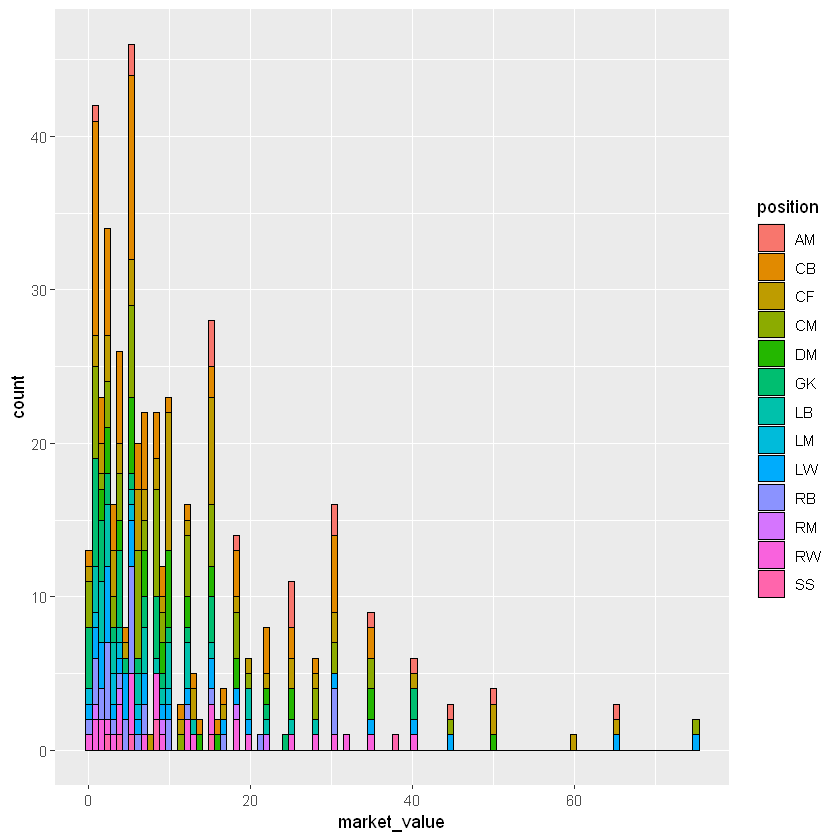

In [7]:
library(ggplot2)
ggplot(df,aes(market_value)) + geom_histogram(aes(fill=position),color='black',bins=100)

#here we can se that the Attacking medfeilders have highest market value this is obivous becuase a mid feilder is like the heart of the team 

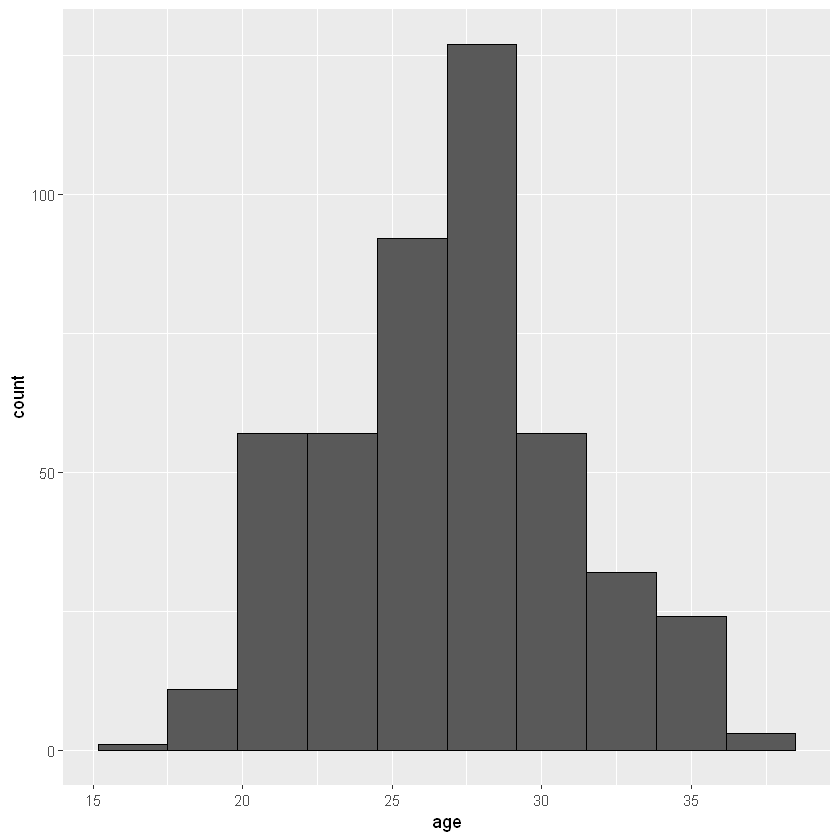

In [8]:
ggplot(df,aes(age)) + geom_histogram(aes(fill=market_value),color='black',bins=10)

#here we can see that player between the age of 20-28 have a high market value and player below 20 and baove 30 have a low market value

In [9]:
library(caTools)
set.seed(101)
sample = sample.split(df$market_value, SplitRatio = .70)
train = subset(df, sample == TRUE)
test = subset(df, sample == FALSE)

Warning message:
"package 'caTools' was built under R version 3.6.2"

In [33]:
num.cols1 <- sapply(test,is.numeric)
num.cols1
cor.data1=cor(test[,num.cols1])
round(cor.data1,2)

name         club          age     position position_cat market_value 
       FALSE        FALSE         TRUE        FALSE         TRUE         TRUE 
  page_views    fpl_value      fpl_sel   fpl_points       region  nationality 
        TRUE         TRUE        FALSE         TRUE         TRUE        FALSE 
 new_foreign      age_cat      club_id     big_club  new_signing 
        TRUE         TRUE         TRUE         TRUE         TRUE

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
age,1.00,0.17,-0.10,-0.01,-0.04,0.21,0.11,-0.13,0.97,-0.07,-0.14,-0.10
position_cat,0.17,1.00,-0.24,-0.32,-0.51,-0.18,-0.14,0.01,0.16,-0.07,-0.03,-0.10
market_value,-0.10,-0.24,1.00,0.79,0.81,0.60,0.18,0.12,-0.09,0.08,0.64,0.17
page_views,-0.01,-0.32,0.79,1.00,0.73,0.56,0.12,-0.03,0.00,0.02,0.51,0.19
fpl_value,-0.04,-0.51,0.81,0.73,1.00,0.66,0.19,0.10,0.00,0.05,0.47,0.14
fpl_points,0.21,-0.18,0.60,0.56,0.66,1.00,0.02,-0.24,0.23,0.11,0.26,0.11
region,0.11,-0.14,0.18,0.12,0.19,0.02,1.00,0.05,0.13,0.15,0.14,0.21
new_foreign,-0.13,0.01,0.12,-0.03,0.10,-0.24,0.05,1.00,-0.11,-0.10,0.17,-0.09
age_cat,0.97,0.16,-0.09,0.00,0.00,0.23,0.13,-0.11,1.00,-0.08,-0.14,-0.12
club_id,-0.07,-0.07,0.08,0.02,0.05,0.11,0.15,-0.10,-0.08,1.00,-0.03,0.18


Warning message:
"package 'corrgram' was built under R version 3.6.2"Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus
Warning message:
"package 'corrplot' was built under R version 3.6.2"corrplot 0.84 loaded


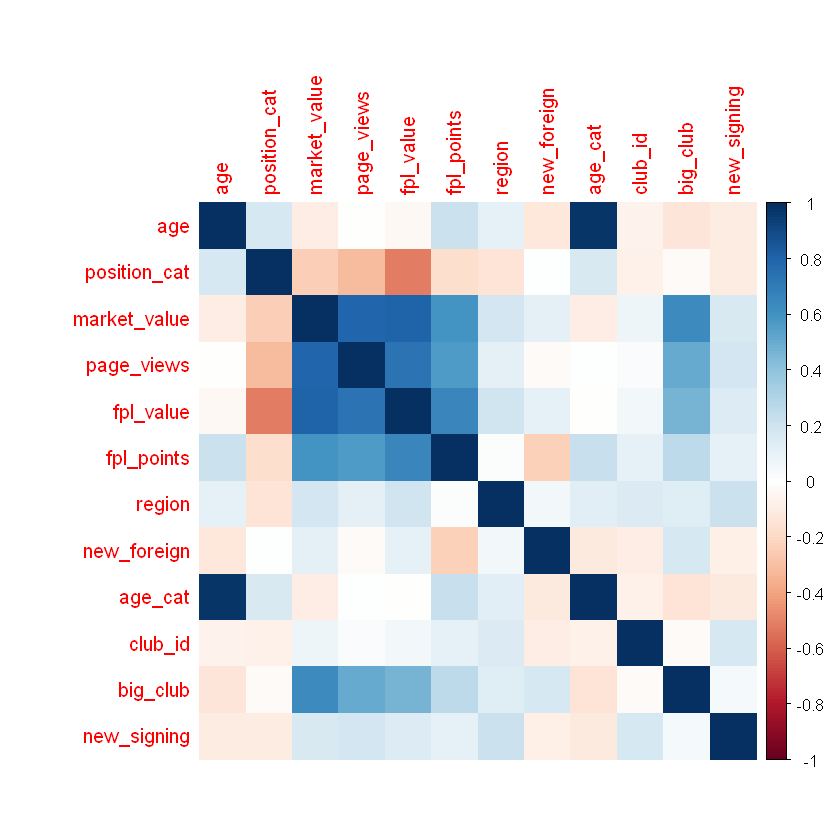

In [34]:
library(corrgram)
library(corrplot)
corrplot(cor.data1,method='color')

In [66]:
model1 <- lm(market_value ~page_views+fpl_value+fpl_points+big_club+age+position,train)
summary(model1)
res=residuals(model1)
res=as.data.frame(res)
head(res)


Call:
lm(formula = market_value ~ page_views + fpl_value + fpl_points + 
    big_club + age + position, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.9222  -3.5167  -0.3186   2.9786  23.7707 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.558e+01  4.188e+00  -3.721 0.000236 ***
page_views   2.200e-03  6.014e-04   3.658 0.000299 ***
fpl_value    5.548e+00  5.183e-01  10.706  < 2e-16 ***
fpl_points   3.457e-02  8.783e-03   3.936 0.000102 ***
big_club     4.902e+00  8.658e-01   5.662 3.43e-08 ***
age         -3.127e-01  8.901e-02  -3.513 0.000509 ***
positionCB   1.627e+00  1.929e+00   0.843 0.399704    
positionCF  -6.074e+00  1.810e+00  -3.356 0.000889 ***
positionCM   6.697e-01  1.910e+00   0.351 0.726159    
positionDM   5.539e+00  2.165e+00   2.558 0.011004 *  
positionGK   1.463e+00  2.095e+00   0.698 0.485466    
positionLB   2.145e-01  2.067e+00   0.104 0.917430    
positionLM  -2.783e+00  2.777e+00  -1.002 0.317

,res
1,1.927368
3,-11.348288
6,6.245694
7,-7.939768
8,-2.550905
9,9.116445


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


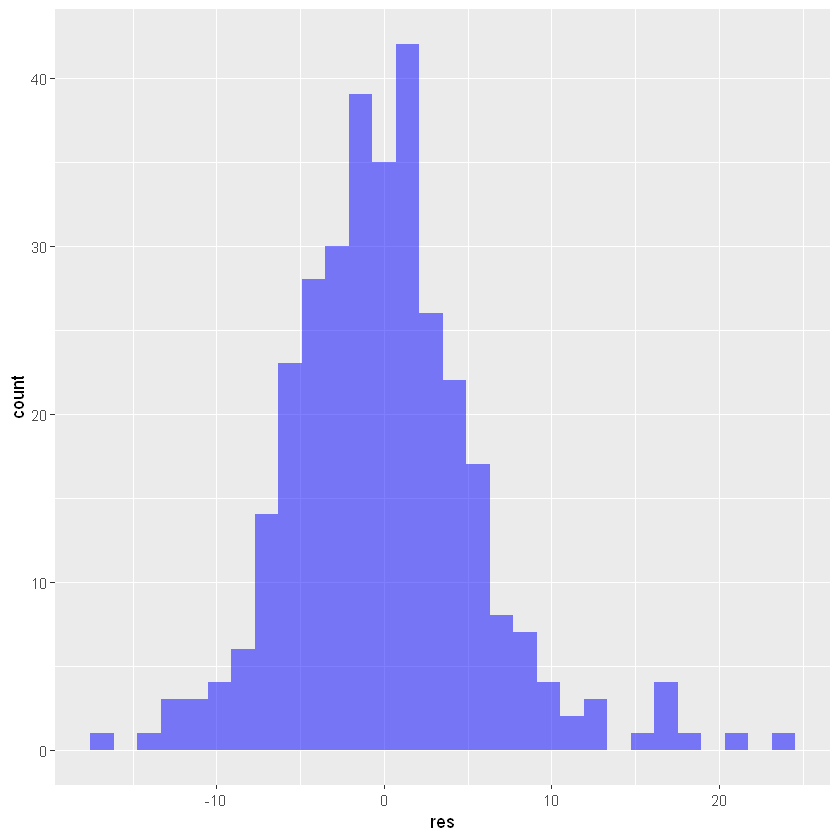

In [67]:
ggplot(res,aes(res))+geom_histogram(fill='blue',alpha=0.5)

In [68]:
pre3<-predict(model1,test)
r=cbind(pre3,test$market_value)
colnames(r)=c('pred','real')
r=as.data.frame(r)
head(r)

,pred,real
2,48.713228,50
4,30.180111,20
5,20.730112,22
10,17.610533,10
25,7.997978,5
27,16.676907,15


In [69]:
to_zero=function(x){
    if (x<0){
        return(0)
    }else{
        return(x)
    }
}
r$pred=sapply(r$pred,to_zero)
head(res)
mse1=mean((r$real-r$pred)^2)
print(mse1)
mse1^0.5
SSE=sum((r$pred-r$real)^2)
SST=sum((mean(test$market_value)-r$real)^2)
R2=1-SSE/SST
R2

,res
1,1.927368
3,-11.348288
6,6.245694
7,-7.939768
8,-2.550905
9,9.116445


[1] 30.74893


[1] 5.545172

[1] 0.8060557